In [1]:
import pandas as pd

In [4]:
df=pd.read_csv(r'C:\Users\Hp\Downloads\SN_AD.xls')

In [5]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [6]:
df1=df.drop(['Gender'],axis=1)

In [7]:
df1

,User ID,Age,EstimatedSalary,Purchased
0,15624510,19,19000,0
1,15810944,35,20000,0
2,15668575,26,43000,0
3,15603246,27,57000,0
4,15804002,19,76000,0
...,...,...,...,...
395,15691863,46,41000,1
396,15706071,51,23000,1
397,15654296,50,20000,1
398,15755018,36,33000,0


In [8]:
df2=df1.drop(['User ID'],axis=1)

In [9]:
df2

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [10]:
target=df2.Purchased
target

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [11]:
df2

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [12]:
df3=df2.drop(['Purchased'],axis=1)

In [13]:
df3

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [14]:
import seaborn as sns

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Count'>

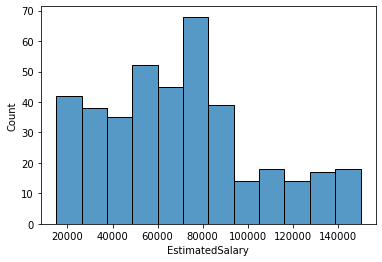

In [15]:
sns.histplot(df3['EstimatedSalary'])

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EstimatedSalary'>

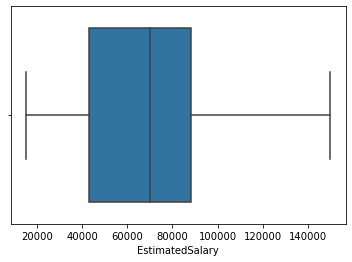

In [16]:
sns.boxplot(df3['EstimatedSalary'])

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Age'>

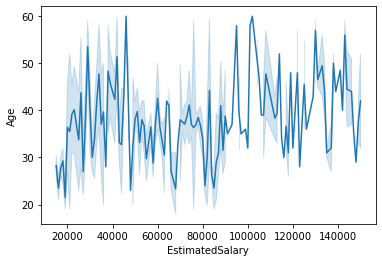

In [17]:
sns.lineplot(x=df['EstimatedSalary'],y=df['Age'])

<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

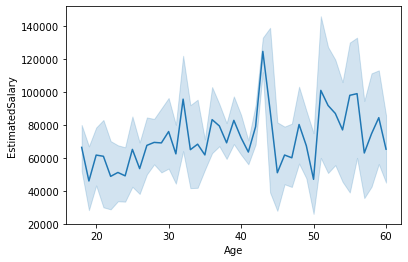

In [18]:
sns.lineplot(y=df['EstimatedSalary'],x=df['Age'])

<AxesSubplot:>

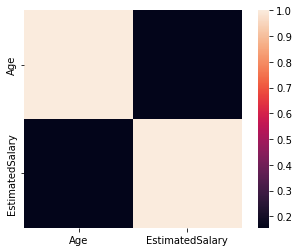

In [19]:
cm=df3.corr()
sns.heatmap(cm,square=True)

In [21]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(df3,target,test_size=0.2,random_state=15)

In [22]:
len(X_train)

320

In [23]:
len(X_test)

80

In [24]:
len(y_train)

320

In [25]:
len(y_test)

80

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score

classifier=KNeighborsClassifier(n_neighbors=3)

classifier.fit(X_train, y_train)

y_pred= classifier.predict(X_test)

In [27]:
classifier.score(X_test,y_test)

0.85

In [28]:
classifier.predict([[25,40000]])

array([0], dtype=int64)

In [29]:
classifier.predict([[35,47000]])

array([0], dtype=int64)

In [30]:
classifier.predict([[30,70000]])

array([0], dtype=int64)

In [32]:
y_predict=classifier.predict(X_test)

In [33]:
y_predict

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [34]:
classifier.score(X_test,y_test)

0.85

In [35]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

p=precision_score(y_test, y_predict)
r=recall_score(y_test, y_predict)
f1=f1_score(y_test, y_predict)

In [36]:
print('precision:',p)
print('recall:',r)
print('f1_score:',f1)

precision: 0.9259259259259259
recall: 0.7142857142857143
f1_score: 0.8064516129032259
